# Importing necessary libraries

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import analysis_functions as analysis

# 1. Recommendation System with LSH

## 1.1 Data Preparation

### Main dataframe 

#### Loading

In [32]:
# Load the dataset for ratings and the one for movies
df_ratings = pd.read_csv("archive/rating.csv")
df_movies = pd.read_csv("archive/movie.csv")

# Creating main df for our analysis (for now)
main_df = pd.merge(df_ratings, df_movies, on="movieId")

FileNotFoundError: [Errno 2] No such file or directory: 'archive/rating.csv'

#### Analysis

In [ ]:
# view shape of df
analysis.find_shape(main_df)

(20000263, 6)

In [ ]:
 # check columns info and dtypes...
analysis.find_info(main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 915.5+ MB


In [ ]:
# calculate statistical summary for numerical columns and summary for non numeric columns
analysis.find_desc(main_df)

(             userId       movieId        rating
 count  2.000026e+07  2.000026e+07  2.000026e+07
 mean   6.904587e+04  9.041567e+03  3.525529e+00
 std    4.003863e+04  1.978948e+04  1.051989e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    3.439500e+04  9.020000e+02  3.000000e+00
 50%    6.914100e+04  2.167000e+03  3.500000e+00
 75%    1.036370e+05  4.770000e+03  4.000000e+00
 max    1.384930e+05  1.312620e+05  5.000000e+00,
                   timestamp                title    genres
 count              20000263             20000263  20000263
 unique             15351121                26729      1329
 top     1996-03-01 00:00:00  Pulp Fiction (1994)     Drama
 freq                    643                67310   1467402)

In [ ]:
# check df for null values
analysis.find_null_vals(main_df)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
# check df for duplicated rows
analysis.find_dup(main_df)

0

In [ ]:
# Check the number of unique users and movies
print(f"Number of unique users: {main_df['userId'].nunique()}")
print(f"Number of unique movies: {main_df['movieId'].nunique()}")


Number of unique users: 138493
Number of unique movies: 26744


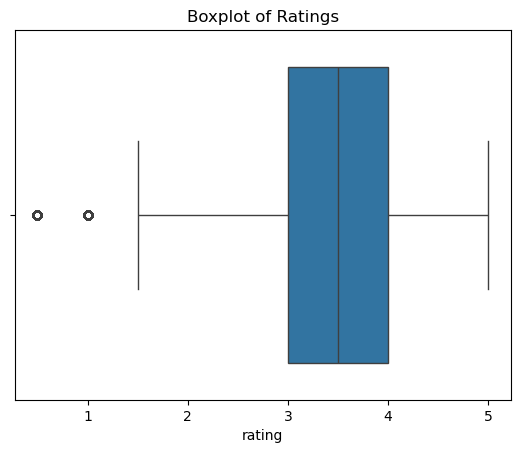

In [ ]:
# check for outliers
sns.boxplot(x=main_df['rating'])
plt.title('Boxplot of Ratings')
plt.show()

# values around 1 are considered outliers, because probably not a lot of movies have a low rating


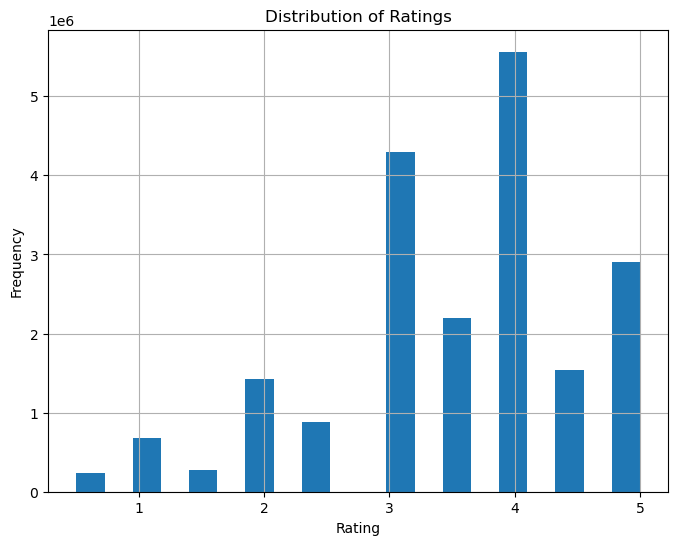

In [ ]:
# Histogram to visualise the frequency of each rating score 
main_df['rating'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# understand what is the lowest rating given 
main_df['rating'].min()

0.5

In [ ]:
# Check user activity (number of ratings per user)
user_activity = main_df['userId'].value_counts()
print(user_activity)

# Check movie popularity (number of ratings per movie)
movie_popularity = main_df['movieId'].value_counts()
print(movie_popularity)


userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64
movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
125545        1
78873         1
112907        1
112909        1
110510        1
Name: count, Length: 26744, dtype: int64


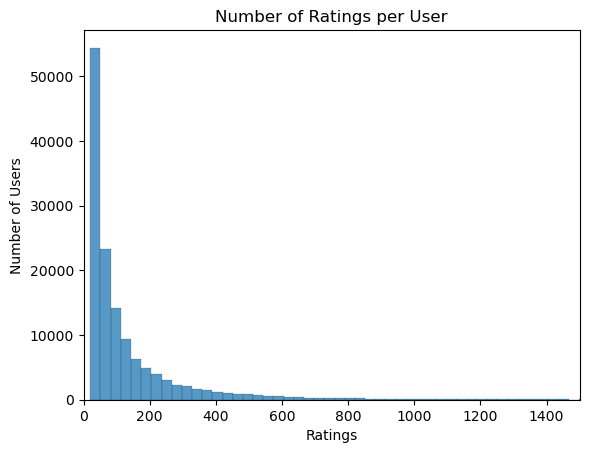

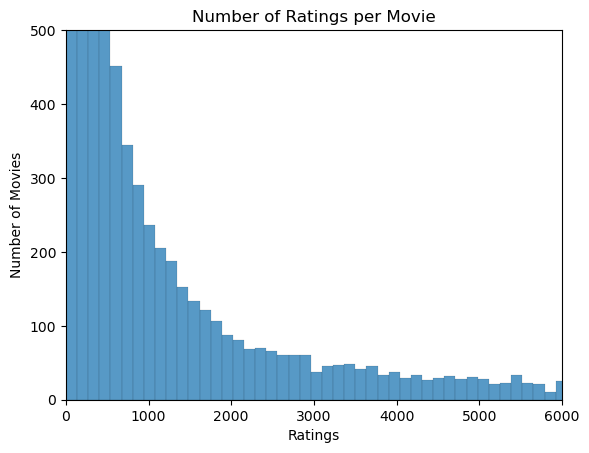

In [ ]:
# User activity visualised on graph
sns.histplot(user_activity, bins=300, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 1500)
plt.show()

# Movie popularity visualised on graph
sns.histplot(movie_popularity, bins=500, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.xlim(0, 6000)
plt.ylim(0, 500)
plt.show()

In [ ]:
# In the main_df description we can notice that drama is the top genre so we decide to dig a little deeper
drama_movies = main_df['genres'].str.contains('Drama')
display(main_df[drama_movies].head())
drama_movies.shape


,userId,movieId,rating,timestamp,title,genres
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
6,1,151,4.0,2004-09-10 03:08:54,Rob Roy (1995),Action|Drama|Romance|War
8,1,253,4.0,2005-04-02 23:35:40,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
10,1,293,4.0,2005-04-02 23:31:43,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
11,1,296,4.0,2005-04-02 23:32:47,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


(20000263,)

In [ ]:
# Show the first 10 high rated movies
high_rated = main_df['rating']>4.0
main_df[high_rated].head(10)

,userId,movieId,rating,timestamp,title,genres
30,1,1196,4.5,2005-04-02 23:32:22,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
31,1,1198,4.5,2005-04-02 23:30:24,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
131,1,4993,5.0,2005-04-02 23:31:22,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
142,1,5952,5.0,2005-04-02 23:30:19,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
158,1,7153,5.0,2005-04-02 23:30:33,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
170,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),Crime|Drama|Horror
171,1,8636,4.5,2005-04-02 23:44:53,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
176,2,62,5.0,2000-11-21 15:29:58,Mr. Holland's Opus (1995),Drama
177,2,70,5.0,2000-11-21 15:31:31,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
180,2,260,5.0,2000-11-21 15:36:54,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [ ]:
# show the top 10 most rated movies
most_rated = main_df.groupby('title').size().sort_values(ascending=False)[:10]
most_rated

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
dtype: int64

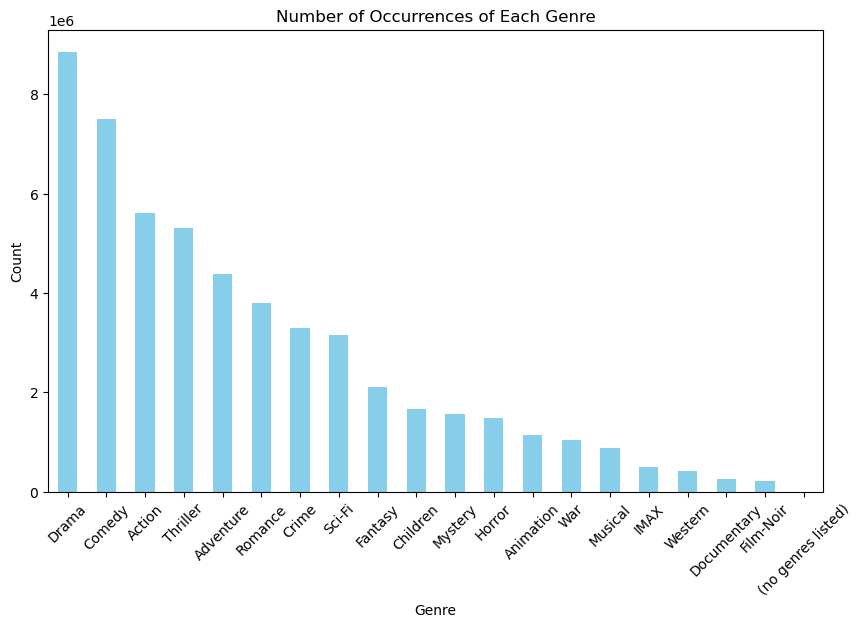

In [ ]:
# Split the genres column and count occurrences
# Create a flat list of all genres
all_genres = main_df['genres'].str.split('|').explode()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Visualize the counts using a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Handling timestamps

In [ ]:
# Handle the timestamp column converting it to datetime
main_df['timestamp'] = pd.to_datetime(main_df['timestamp']) 
print(df_ratings['timestamp'].head())

# checking dtype of timestamp column changed
main_df.info()

# not needed it until now...
''' 
# Extract useful time-based features (e.g., year, month)
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
print(df.head())
'''


0    2005-04-02 23:53:47
1    2005-04-02 23:31:16
2    2005-04-02 23:33:39
3    2005-04-02 23:32:07
4    2005-04-02 23:29:40
Name: timestamp, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
 4   title      object        
 5   genres     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 915.5+ MB


" \n# Extract useful time-based features (e.g., year, month)\ndf['year'] = df['timestamp'].dt.year\ndf['month'] = df['timestamp'].dt.month\ndf['day_of_week'] = df['timestamp'].dt.dayofweek\ndf['day'] = df['timestamp'].dt.day\ndf['hour'] = df['timestamp'].dt.hour\ndf['minute'] = df['timestamp'].dt.minute\ndf['second'] = df['timestamp'].dt.second\nprint(df.head())\n"

### Other dataframes

#### Loading

In [ ]:
# Load the rest of the dfs
all_dfs = []
df_genome_scores = pd.read_csv("archive/genome_scores.csv")
df_genome_tags = pd.read_csv("archive/genome_tags.csv")
df_links = pd.read_csv("archive/link.csv")
df_tags = pd.read_csv("archive/tag.csv")
all_dfs.append(("genome_scores", df_genome_scores))
all_dfs.append(("genome_tags", df_genome_tags))
all_dfs.append(("links", df_links))
all_dfs.append(("tags", df_tags))

#### Analysis

In [ ]:
# Analyse the rest of the df information
for df_name, dataframe in all_dfs:
    print("--------", df_name, "------------")
    print("--------- df shape")
    print(analysis.find_shape(dataframe))
    print("--------- df info")
    print(analysis.find_info(dataframe))
    print("--------- df description")
    print(analysis.find_desc(dataframe))
    print("--------- df null count")
    print(analysis.find_null_vals(dataframe))
    print("--------- df duplicate count")
    print(analysis.find_dup(dataframe))
    

-------- genome_scores ------------
--------- df shape
(11709768, 3)
--------- df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB
None
--------- df description
            movieId         tagId     relevance
count  1.170977e+07  1.170977e+07  1.170977e+07
mean   2.584297e+04  5.645000e+02  1.164833e-01
std    3.467615e+04  3.256254e+02  1.542463e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    2.926000e+03  2.827500e+02  2.425000e-02
50%    6.017000e+03  5.645000e+02  5.650000e-02
75%    4.606200e+04  8.462500e+02  1.415000e-01
max    1.311700e+05  1.128000e+03  1.000000e+00
None
--------- df null count
movieId      0
tagId        0
relevance    0
dtype: int64
--------- df duplicate count
0
-------- genome_tags ------------
--------- df 

We notice that the links and tags df contains null values, so we handle it in this phase 

#### Cleaning

In [ ]:
# We fill nan values with empty space in order not to lose any important information
df_links.fillna(" ")

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [ ]:
# We drop nan values because they are very few and this df only contains information on tags, 
# and if the tag is not present, the row doesnt make sense
df_tags.dropna()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


**Further analysis of these dfs can be added if needed later on in the project**

## 1.2 Minhash Signatures

---
# 2. Grouping Movies Together!
In this section, you will explore clustering algorithms to group the movies you have based on specific features you choose to consider for them.

## 2.1 Feature Engineering
As you know, the dataset provided isn’t particularly clean or well-structured to represent the features of the movies. Therefore, your first step is to create a more suitable set of attributes (variables, features, covariates) to represent the movies based on the available information. Here are some variables or features you might consider for clustering:

1. movieid id of each movie
2. genres list of genres attached to the movie (given that a movie may have several genres, it’s essential to devise a method to accurately represent the genres for each movie)
3. ratings_avg the average ratings provided by users for the movie
4. relevant_genome_tag the most relevant tag to the movie given in the genome set
5. common_user_tag the most common tag given to the movie by the users

In addition to the above features, include at least three additional features for clustering.

Note: If you have accurately identified and applied the methods for representing the features, you should have more than eight features! How could this happen? Take a moment to think about it.

In [458]:
import pandas as pd

# First we load all the datasets downloaded
tag = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/tag.csv')
rating = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/rating.csv')
movie = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/movie.csv')
link = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/link.csv')
genome_scores = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/genome_scores.csv')
genome_tags = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/genome_tags.csv')


In [459]:
# The movie dataset contains the sequent informations:
movies_df = movie.copy()
display(movies_df.head())
print(f"Are there any NAs in the dataset?:\n{movies_df.isna().any()}\n")
print(f"How many movies are in this df? {len(movies_df["movieId"].unique())}\n")


# We create a one-hot encodeing of the genres column
genres_split = movies_df['genres'].str.get_dummies('|') # Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value
print('Here is the one hot encoded variable:')
display(genres_split)
movies_df = pd.concat([movies_df, genres_split], axis=1) # we add the new columns to the df



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Are there any NAs in the dataset?:
movieId    False
title      False
genres     False
dtype: bool

How many movies are in this df? 27278

Here is the one hot encoded variable:


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [460]:
# To get the avg rating we need to take a look at the rating dataset
display(rating.head())
print(f"Are there any NAs in the dataset?:\n{rating.isna().any()}\n")
print(f"How many movies are in this df? {len(rating["movieId"].unique())}")
# there are no NA so we can continue

ratings_grouped = rating.groupby('movieId')['rating'] #group by movieid
ratings_avg = ratings_grouped.mean().reset_index() #get the mean for each group and reset index

ratings_avg.columns = ['movieId', 'ratings_avg'] #rename the columns

movies_df = pd.merge(movies_df, ratings_avg, on='movieId', how='inner') #merge with our previous dataset using the column movieId as index, "inner" means that the function will use only keys that are in both dataframes 
#keeping the order of the first one, this is to reduce the number of empty values generated by the merge that could give us many problems later



,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Are there any NAs in the dataset?:
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

How many movies are in this df? 26744


In [461]:
# Now lets look at the genome_scores and genome_tag df:
display(genome_scores.head())
print(f"Are there any NAs in the dataset?:\n{genome_scores.isna().any()}\n")
display(genome_tags.head())
print(f"Are there any NAs in the dataset?:\n{genome_tags.isna().any()}\n")


print(f"Check that the two df have compatible indexes, comparing number of unique tagIds: {len(genome_tags['tagId'].unique())}, {len(genome_scores['tagId'].unique())}")

#we need to merge the two df
genome_full = pd.merge(genome_scores, genome_tags, how= 'inner', on='tagId')


,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


Are there any NAs in the dataset?:
movieId      False
tagId        False
relevance    False
dtype: bool



,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Are there any NAs in the dataset?:
tagId    False
tag      False
dtype: bool

Check that the two df have compatible indexes, comparing number of unique tagIds: 1128, 1128


In [462]:
#we want the most relevant tag for each movie, so we will only take the ones with the highest relevance scores
genome_full_grouped = genome_full.groupby('movieId')
max_row_indexes = genome_full_grouped['relevance'].idxmax() #we get the indexes of the maximum values for each group
relevant_tags = genome_full.loc[max_row_indexes][['movieId', 'tag']]
relevant_tags.columns = ['movieId', 'relevant_genome_tag']
#now we merge
movies_df = pd.merge(movies_df, relevant_tags , on='movieId', how='inner')


In [463]:
# to get the most common user tag we can still work with tag df
display(tag.head())
print(f"Are there any NAs in the dataset?:\n{tag.isna().any()}\n")
tag = tag.dropna(subset=['tag'])
print(f"How many movies are in this df? {len(tag["movieId"].unique())}")

#we group by movieId and tag
new_tag = tag.groupby(["movieId", "tag"])

tag_counts = new_tag.size().reset_index(name='count') #this counts the number of rows for each group

most_common_tag = tag_counts.loc[tag_counts.groupby('movieId')['count'].idxmax()][['movieId', 'tag']]

most_common_tag.columns = ['movieId', 'common_user_tag'] #we rename the two columns

movies_df = pd.merge(movies_df, most_common_tag, on='movieId', how='inner') 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


Are there any NAs in the dataset?:
userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

How many movies are in this df? 19545


### Some additional features:

In [464]:
# bonus feature n_1 : Total number of ratings per movie
total_ratings = rating.groupby('movieId')['rating'].count().reset_index()
total_ratings.columns = ['movieId', 'total_ratings']
movies_df = pd.merge(movies_df, total_ratings, on='movieId', how='inner')

# bonus feature n_2 : Number of unique users who tagged the movie
unique_users_tagged = tag.groupby('movieId')['userId'].nunique().reset_index()
unique_users_tagged.columns = ['movieId', 'unique_users_tagged']
movies_df = pd.merge(movies_df, unique_users_tagged, on='movieId', how='inner')

# bonus feature n_3 : Variance of rating scores per movie
rating_variance = rating.groupby('movieId')['rating'].var().reset_index()
rating_variance.columns = ['movieId', 'rating_variance']
movies_df = pd.merge(movies_df, rating_variance, on='movieId', how='inner')


movies_df.fillna({'rating_variance': movies_df['rating_variance'].mean()} , inplace=True)

# Final dataset ready for clustering
display(movies_df.head())


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Sci-Fi,Thriller,War,Western,ratings_avg,relevant_genome_tag,common_user_tag,total_ratings,unique_users_tagged,rating_variance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,3.921240,toys,Pixar,49695,152,0.790342
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,3.211977,adventure,Robin Williams,22243,46,0.904686
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,3.151040,good sequel,moldy,12735,15,1.013328
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,2.861393,women,characters,2756,4,1.200563
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,3.064592,good sequel,steve martin,12161,11,0.964598


---
## 2.2 Choose your features (variables)!
With multiple features available for the movies, you need to consider the following two questions: 1. Should you normalize the data or leave it as is? 2. Should you include all these features, or can you reduce the dimensionality of the data?

- What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?
- If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the scikit-learn package for tools and functions that facilitate data normalization.
- Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
- If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

---
## Q1: What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

### ANSWER: 
Normalizing is useful when the data we are working with has very different scales. Normalization rescales the features to ensure that all of them contribute equally to the clustering process. For example, if we are working with ratings_avg (ranging from 0-5) and total_ratings (which could be in the hundreds or thousands), the distance calculations used in clustering would be dominated by total_ratings purely due to its larger scale. Since later on we will be working with K-means it's a good idea to normalize the data.



In [465]:
# let's take a look at some statistics for each column of our df
movies_df.describe()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,ratings_avg,total_ratings,unique_users_tagged,rating_variance
count,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.00000,9816.000000,9816.000000,9816.000000,...,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000
mean,26367.707620,0.000102,0.169825,0.116544,0.044723,0.059800,0.35707,0.122759,0.044519,0.488794,...,0.060513,0.170742,0.089955,0.198859,0.043908,0.021088,3.287833,2006.763142,16.020069,0.935921
std,34586.610044,0.010093,0.375498,0.320893,0.206705,0.237129,0.47916,0.328177,0.206256,0.499900,...,0.238448,0.376302,0.286132,0.399162,0.204901,0.143685,0.501907,4840.520457,27.874957,0.266425
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.837321,1.000000,1.000000,0.142857
25%,3042.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.991595,143.000000,3.000000,0.748587
50%,6240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.367846,407.000000,7.000000,0.900433
75%,47976.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.661711,1490.750000,16.000000,1.081607
max,131170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.500000,67310.000000,561.000000,4.500000


In [466]:
from sklearn.preprocessing import StandardScaler

# Selecting the columns that need normalization
features_to_normalize = ['ratings_avg', 'total_ratings', 'rating_variance', 'unique_users_tagged'] + list(genres_split.columns)


We will normalize the one hot encoded genres list too as we will apply PCA dimensional reduction to them. PCA is sensitive to the scales of the variables so if we don't normalize our data before applying it, features with higher numerical ranges will contribute more to the variance, potentially misleading it.

In [467]:

# Normalizing selected features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(movies_df[features_to_normalize])

# Creating a new DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize)
movies_df_normalized = pd.concat([movies_df[['movieId', 'title', 'relevant_genome_tag', 'common_user_tag']], normalized_df], axis=1)

In [468]:
display(movies_df_normalized.describe()) # let's check the normalization went correctly
display(normalized_df.head()) #check we worked with the correct columns

,movieId,ratings_avg,total_ratings,rating_variance,unique_users_tagged,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,9816.000000,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,...,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03,9.816000e+03
mean,26367.707620,3.011265e-16,-4.632715e-17,-3.300810e-16,6.659528e-17,8.686342e-18,-2.895447e-17,-4.632715e-17,-9.265431e-17,-3.040220e-17,...,-2.461130e-17,4.379364e-17,4.632715e-17,-8.975886e-17,8.613955e-17,-1.085793e-16,-7.817707e-17,-2.605902e-17,-6.949073e-17,1.737268e-17
std,34586.610044,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,1.000000,-4.882657e+00,-4.143904e-01,-2.976836e+00,-5.388648e-01,-1.009380e-02,-4.522886e-01,-3.632063e-01,-2.163716e-01,-2.521981e-01,...,-1.069458e-01,-3.301927e-01,-1.295400e-01,-2.025922e-01,-2.537936e-01,-4.537585e-01,-3.143994e-01,-4.982166e-01,-2.142997e-01,-1.467730e-01
25%,3042.750000,-5.902563e-01,-3.850532e-01,-7.031763e-01,-4.671122e-01,-1.009380e-02,-4.522886e-01,-3.632063e-01,-2.163716e-01,-2.521981e-01,...,-1.069458e-01,-3.301927e-01,-1.295400e-01,-2.025922e-01,-2.537936e-01,-4.537585e-01,-3.143994e-01,-4.982166e-01,-2.142997e-01,-1.467730e-01
50%,6240.000000,1.594255e-01,-3.305109e-01,-1.332092e-01,-3.236069e-01,-1.009380e-02,-4.522886e-01,-3.632063e-01,-2.163716e-01,-2.521981e-01,...,-1.069458e-01,-3.301927e-01,-1.295400e-01,-2.025922e-01,-2.537936e-01,-4.537585e-01,-3.143994e-01,-4.982166e-01,-2.142997e-01,-1.467730e-01
75%,47976.500000,7.449535e-01,-1.066083e-01,5.468430e-01,-7.200118e-04,-1.009380e-02,-4.522886e-01,-3.632063e-01,-2.163716e-01,-2.521981e-01,...,-1.069458e-01,-3.301927e-01,-1.295400e-01,-2.025922e-01,-2.537936e-01,-4.537585e-01,-3.143994e-01,-4.982166e-01,-2.142997e-01,-1.467730e-01
max,131170.000000,2.415247e+00,1.349164e+01,1.337808e+01,1.955188e+01,9.907068e+01,2.210978e+00,2.753256e+00,4.621678e+00,3.965138e+00,...,9.350531e+00,3.028534e+00,7.719624e+00,4.936025e+00,3.940210e+00,2.203815e+00,3.180668e+00,2.007159e+00,4.666363e+00,6.813244e+00


,ratings_avg,total_ratings,rating_variance,unique_users_tagged,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.262065,9.852384,-0.546447,4.878460,-0.010094,-0.452289,2.753256,4.621678,3.965138,1.341853,...,-0.106946,-0.330193,-0.12954,-0.202592,-0.253794,-0.453759,-0.314399,-0.498217,-0.2143,-0.146773
1,-0.151144,4.180804,-0.117244,1.075570,-0.010094,-0.452289,2.753256,-0.216372,3.965138,-0.745238,...,-0.106946,-0.330193,-0.12954,-0.202592,-0.253794,-0.453759,-0.314399,-0.498217,-0.2143,-0.146773
2,-0.272560,2.216452,0.290554,-0.036596,-0.010094,-0.452289,-0.363206,-0.216372,-0.252198,1.341853,...,-0.106946,-0.330193,-0.12954,-0.202592,-0.253794,2.203815,-0.314399,-0.498217,-0.2143,-0.146773
3,-0.849683,0.154792,0.993357,-0.431236,-0.010094,-0.452289,-0.363206,-0.216372,-0.252198,1.341853,...,-0.106946,-0.330193,-0.12954,-0.202592,-0.253794,2.203815,-0.314399,-0.498217,-0.2143,-0.146773
4,-0.444810,2.097864,0.107641,-0.180102,-0.010094,-0.452289,-0.363206,-0.216372,-0.252198,1.341853,...,-0.106946,-0.330193,-0.12954,-0.202592,-0.253794,-0.453759,-0.314399,-0.498217,-0.2143,-0.146773


Now to know how many Principal Components we need, we will take a look at the graph of the cumulated explained variance. We will use the PCA() function from sklearn, and the attribute "explained_variance_ratio_" which returnes the percentage of variance explained by each of the selected components.

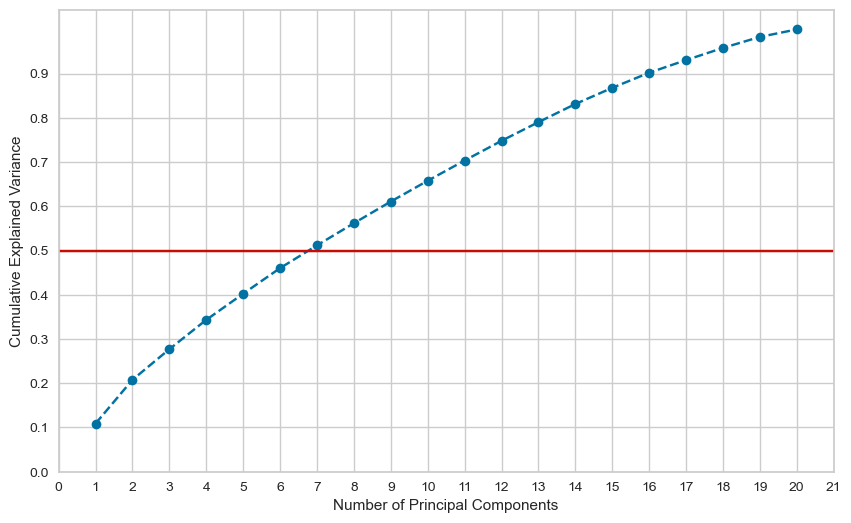

In [469]:
### Now to know how many Principal Components we need, it's a good idea to run some testing.

from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np

# we apply PCA only to the one-hot encoded genres (genres_split.columns)
genres_split_columns = genres_split.columns
pca_full = PCA()
reduced_genres_full = pca_full.fit_transform(movies_df_normalized[genres_split_columns]) #we use only the one-hot encoded genres

# calculate the cumulative explained variance to determine the optimal number of components
percent_explained_var = pca_full.explained_variance_ratio_
percent_variance_ratio_cumsum = np.cumsum(percent_explained_var) #cumsum creates an array with the cumulative sum of the array given as input

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percent_variance_ratio_cumsum) + 1), percent_variance_ratio_cumsum, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(0, 22, step=1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.5, color='r', linestyle='-')  # Add a horizontal line for 80% explained variance
plt.show()


By looking at this graph we see that we can explain almost 0.5 of the overall variability in the one hot encoded variable by taking the first 7 PCs, effectively reducing by more than half the number of the features. This is of course at the cost of a loss of information and interpretability, but would still be very useful later on when clustering to avoid the *curse of dimensionality*.

In [470]:
n_optimal =np.where(percent_variance_ratio_cumsum >= 0.5)[0][0] +1  #we get the number of PC that meets our condition

print(f'Optimal number of Principal Components for genres: {n_optimal}')

# we do PCA again with the optimal number of components
pca = PCA(n_components = n_optimal)
reduced_genres = pca.fit_transform(movies_df_normalized[genres_split_columns])

# we create a DataFrame with the reduced features
new_PC_names = [f'PC_Genres{i+1}' for i in range(n_optimal)]
reduced_genres_df = pd.DataFrame(reduced_genres, columns=new_PC_names)

# merge with movie_df
movies_df_reduced = pd.concat([movies_df_normalized[['movieId', 'title', 'relevant_genome_tag', 'common_user_tag', 'ratings_avg','total_ratings', 'rating_variance', 'unique_users_tagged']], reduced_genres_df], axis=1)

movies_df_reduced.head()



Optimal number of Principal Components for genres: 7


,movieId,title,relevant_genome_tag,common_user_tag,ratings_avg,total_ratings,rating_variance,unique_users_tagged,PC_Genres1,PC_Genres2,PC_Genres3,PC_Genres4,PC_Genres5,PC_Genres6,PC_Genres7
0,1,Toy Story (1995),toys,Pixar,1.262065,9.852384,-0.546447,4.878460,6.743363,-0.077740,0.114523,2.714005,-0.767565,-0.101008,0.758324
1,2,Jumanji (1995),adventure,Robin Williams,-0.151144,4.180804,-0.117244,1.075570,4.292340,0.468050,0.580301,1.349953,-0.942815,-0.477837,0.515693
2,3,Grumpier Old Men (1995),good sequel,moldy,-0.272560,2.216452,0.290554,-0.036596,0.080542,-1.792043,-0.689761,-0.124640,1.642633,-0.210538,-0.472322
3,4,Waiting to Exhale (1995),women,characters,-0.849683,0.154792,0.993357,-0.431236,-0.518415,-2.079312,0.293330,0.269234,1.293415,-0.808908,-0.583144
4,5,Father of the Bride Part II (1995),good sequel,steve martin,-0.444810,2.097864,0.107641,-0.180102,0.189584,-0.965642,-0.980751,-0.400768,0.820977,0.610751,0.074658


---
## 2.3 Clustering
Now that you have prepared the data, you can create the clusters.

- How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.
- Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.
- Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.
- Ask an LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to recommend another clustering algorithm. Use that LLM to describe the workings of the algorithm, as well as its advantages and disadvantages compared to K-means and K-means++. Additionally, ask to implement the algorithm for you or utilize an existing version from a package. Apply that algorithm to your data and explain any differences you observe in the results compared to those obtained previously.

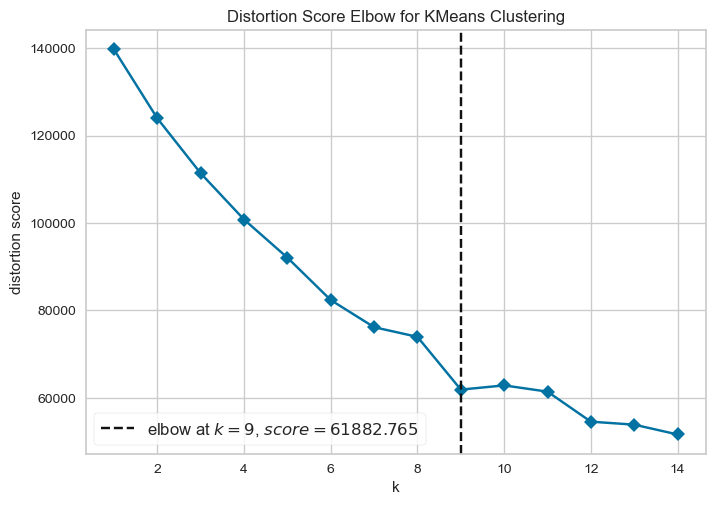

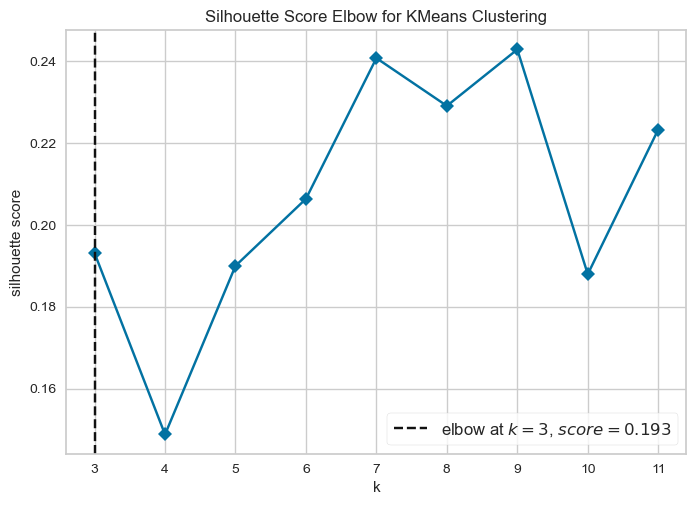

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [471]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

features = movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']) 

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15), timings=False)
visualizer.fit(features)
visualizer.show() 


visualizer = KElbowVisualizer(
model, k=(3,12), metric='silhouette', timings=False) # this metric of course requires at least k = 2 otherwise there is no other cluster to compare to, we start with 3 as it is the best score following the elbow method
visualizer.fit(features) 
visualizer.show() 



The two methods applied above are the Elbow Method and Silhouette Method. Here is an short explanation on how they work:

- Elbow Method: 

analyses the "Within-Cluster Sum of Squares" (WCSS), plotting the value of SSE against different values of k, and selecting k at the "elbow point" where the decrease in error slows significantly. In some cases however the elbow point is not so clearly visible (this is also the case for our situation).

  $WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \lVert x - \mu_i \rVert^2$


- The Silhouette Method: 

This method captures both the cohesion (how close a point is to points in the same cluster) and separation (how far the point is from points in other clusters). In other words measures how similar a point is to its assigned cluster compared to other clusters. This method is computationally intensive, especially for large datasets as ours.

FROM WIKIPEDIA:

For data point $i \in C_I$ (data point $i$ in the cluster $C_I$), let

$
a(i) = \frac{1}{|C_I| - 1} \sum_{j \in C_I, j \neq i} d(i, j)
$

be the mean distance between $i$ and all other data points in the same cluster, where $|C_I|$ is the number of points belonging to cluster $C_I$, and $d(i, j)$ is the distance between data points $i$ and $j$ in the cluster $C_I$ (we divide by $|C_I| - 1$ because we do not include the distance $d(i, i)$ in the sum). We can interpret $a(i)$ as a measure of how well $i$ is assigned to its cluster (the smaller the value, the better the assignment).

We then define the mean dissimilarity of point $i$ to some cluster $C_J$ as the mean of the distance from $i$ to all points in $C_J$ (where $C_J \neq C_I$).

For each data point $i \in C_I$, we now define

$
b(i) = \min_{J \neq I} \frac{1}{|C_J|} \sum_{j \in C_J} d(i, j)
$

to be the **smallest** (hence the min operator in the formula) mean distance of $i$ to all points in any other cluster (i.e., in any cluster of which $i$ is not a member). The cluster with this smallest mean dissimilarity is said to be the "neighboring cluster" of $i$ because it is the next best fit cluster for point $i$.

We now define a **silhouette** (value) of one data point $i$

$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}, \text{ if } |C_I| > 1
$

and 

$
s(i) = 0, \text{ if } |C_I| = 1
$

Which can be also written as:

$
s(i) = \begin{cases}
1 - \frac{a(i)}{b(i)}, & \text{if } a(i) < b(i) \\
0, & \text{if } a(i) = b(i) \\
\frac{b(i)}{a(i)} - 1, & \text{if } a(i) > b(i)
\end{cases}
$

From the above definition it is clear that

$
-1 \leq s(i) \leq 1
$


---

Now we can work on writing or K-means algorithm with MapReduce:

1. First we write the two functions needed to calculate the euclidean distance and determine the closest centroid

In [472]:
# Function to compute Euclidean distance
def euclidean(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Function to find the nearest centroid
def closest_centroid(point, centroids):
    distances = [euclidean(point, centroid) for centroid in centroids]
    return np.argmin(distances)

In [473]:
from pyspark import SparkContext

sc = SparkContext()

numerical_columns = movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId'])  #the method obviously works only with the numerical features of the df

points_rdd = sc.parallelize(numerical_columns.values) # this creates the Resilient Distributed Dataset from our original df, 
# which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel.

# we set number of clusters and iterations
k = 3 # determined with the silhouette method
max_iterations = 60 #arbitrary large number of iterations after which to stop

# initialize centroids from the numerical column
centroids = numerical_columns.sample(n=k, random_state=41).values

tolerance = 1e-4 #set a tolerance level to use convergence as a stopping cryterion 
previous_centroids = np.zeros_like(centroids)
iteration = 0

# this loop does all the work
while iteration < max_iterations:
    # Check for convergence
    centroid_shifts = [euclidean(centroids[i], previous_centroids[i]) for i in range(k)] 
    if max(centroid_shifts) < tolerance: #is the distance between the old and new centroids too small? then stop
        break

    # 1) Map phase: Assign each point to the nearest centroid
    clustered_points = points_rdd.map(lambda point: (closest_centroid(point, centroids), (point, 1))) #map function applies a function to each element of the RDD

    # 2) Reduce phase: Compute new centroids using pairwise summation
    new_centroids = clustered_points.reduceByKey(
        lambda x, y: (x[0] + y[0], x[1] + y[1])  # sum points and count them
    ).mapValues(lambda x: x[0] / x[1])  # compute the average to find the new centroid

    previous_centroids = centroids
    centroids = new_centroids.map(lambda x: x[1]).collect() #update the centroids

    
    centroids = sc.broadcast(centroids).value # broadcast the new centroids to all nodes 

    iteration += 1


print("Final centroids:")
for idx, centroid in enumerate(centroids):
    print(f"Centroid {idx + 1}: {centroid}")

print(f"Number of iterations: {iteration}")

# this is to stop Spark Context execution
sc.stop()


Final centroids:
Centroid 1: [-0.29752173  0.16541955  0.34640516  0.14963761  3.65318696  0.29332638
  0.23010321  0.97920797 -0.48924402 -0.04632426  0.06489098]
Centroid 2: [-0.28440561  0.20190924  0.02506677  0.24290267 -0.57671598  1.63794908
 -0.36830256  0.16793357  0.14389849 -0.09556897  0.04640142]
Centroid 3: [ 0.18427949 -0.12385121 -0.06500255 -0.1414785  -0.27454238 -0.845026
  0.14492216 -0.23118159  0.00419358  0.05375284 -0.0325555 ]
Number of iterations: 32


---
## K-Means++ 
Is an improved version of the classic K-Means clustering algorithm. It aims to address one of the significant weaknesses of the standard K-Means—its sensitivity to the initial choice of centroids.
The steps are for the K-Means++ initialization are:

1. **Select the First Centroid Randomly**:
   - Pick the first centroid, $c_1$, uniformly at random from the dataset.


In [474]:
#we initialize spark again
sc = SparkContext()

# again numerical columns except for 'movieId'
numerical_columns = movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId'])

points_rdd = sc.parallelize(numerical_columns.values)

#randomly pick the first centroid
first_centroid = numerical_columns.sample(n=1, random_state=41).values[0]
centroids = [first_centroid]


2. **Select Subsequent Centroids**:
   - For each data point $x$, calculate its distance $D(x)$ to the nearest existing centroid.
   - Select the next centroid, $c_i$, from the remaining points with probability proportional to $D(x)^2$:

      $
         P(x) = \frac{D(x)^2}{\sum_{x'} D(x')^2}
      $

3. **Repeat** until $k$ centroids are chosen.

In [475]:
#we will use the same k and max_iterations as before
for _ in range(1, k):
    # calculate the distance of each point to the nearest centroid
    distances = points_rdd.map(lambda point: min([euclidean(point, centroid) for centroid in centroids]))
    
    # calculate the probability distribution
    distances_squared = distances.map(lambda d: d ** 2).collect() #we collect the data to work on it with np
    total_distance = sum(distances_squared)
    probabilities = distances_squared / total_distance  
    
    # Sample a new centroid based on the calculated probabilities
    new_centroid_idx = np.random.choice(len(probabilities), p=probabilities)
    new_centroid = numerical_columns.values[new_centroid_idx]
    
    # Append the new centroid
    centroids.append(new_centroid)

centroids = np.array(centroids)


4. **Proceed with Standard K-Means**:

   - After selecting the $k$ centroids, proceed with the usual K-Means clustering steps.


In [476]:
previous_centroids = np.zeros_like(centroids)
iteration = 0
#we already have set the tolerance

while iteration < max_iterations:
    # Check for convergence
    centroid_shifts = [euclidean(centroids[i], previous_centroids[i]) for i in range(k)]
    if max(centroid_shifts) < tolerance:
        break

    # Map phase: Assign each point to the nearest centroid
    clustered_points = points_rdd.map(lambda point: (closest_centroid(point, centroids), (point, 1)))

    # Reduce phase: Compute new centroids using pairwise summation
    new_centroids = clustered_points.reduceByKey(
        lambda x, y: (x[0] + y[0], x[1] + y[1])  # Sum points and count them
    ).mapValues(lambda x: x[0] / x[1])  # Compute the average to find the new centroid

    # Collect the new centroids
    previous_centroids = centroids
    centroids = new_centroids.map(lambda x: x[1]).collect()

    # Broadcast the new centroids to all nodes for the next iteration
    centroids = sc.broadcast(centroids).value

    iteration += 1

# Final centroids after convergence or max_iterations
print("Final centroids:")
for idx, centroid in enumerate(centroids):
    print(f"Centroid {idx + 1}: {centroid}")

print(f"Number of iterations: {iteration}")
sc.stop()


Final centroids:
Centroid 1: [-0.02751706  0.83452427  0.09109771  0.82335812  3.10651418  1.02685364
  0.49352976  0.419246   -0.14876101 -0.10153902 -0.17251865]
Centroid 2: [-0.57246308 -0.18485136  0.4701679  -0.25885634  0.05430534  0.02942837
 -0.92035486 -0.49120794  0.18689585  0.27660386  0.10383803]
Centroid 3: [ 0.45969192 -0.04212785 -0.39302494  0.01901787 -0.74492138 -0.25532476
  0.61754483  0.29438175 -0.11443696 -0.19616844 -0.04327507]
Number of iterations: 22


Running these two algorithms we can see that the K-means++ as expected converged faster than the simple K-means. This is because of it's bettere initialization technique that better spreads out the initial centroids.

### Now we ask GPT to provide a new algorithm and implement it: (we had to edit it a bit to make it work as we did not have the final script to give to GPT as a base at the time)
Also since the method works with the categorical features, we need to apply tokenization to them. This as been done by us.

In [477]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Get the English stopwords list
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Let's create a function to remove the stopwords and ponctuation marks

def PROC(text):
    # Tokenize the text
    
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    tokens = word_tokenize(text)
    
    # Remove stopwords and make words lowercase
    
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(filtered_tokens)

for i in ['relevant_genome_tag', 'common_user_tag']:

    for idx, tags in enumerate(movies_df_reduced[i]):

        movies_df_reduced.loc[idx, i] = PROC(str(tags))





[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/augustodeluzenberger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [478]:
from kmodes.kprototypes import KPrototypes

movies_df = movies_df_reduced.drop(columns=['movieId','title'])

# Split the data into categorical and numerical columns
categorical_columns = movies_df.select_dtypes(include=['object']).columns
numerical_columns = movies_df.select_dtypes(include=[np.number]).columns

# Convert categorical columns to numerical values using label encoding (for K-Prototypes)
categorical_data = movies_df[categorical_columns]
categorical_data_encoded = categorical_data.apply(lambda x: x.astype('category').cat.codes)
numerical_data = movies_df[numerical_columns]

# Prepare the data for K-Prototypes
X = np.concatenate([numerical_data.values, categorical_data_encoded.values], axis=1)

# Set the number of clusters and initialize K-Prototypes model
k = 4
kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)

# Fit the model
clusters = kproto.fit_predict(X, categorical=list(range(len(categorical_columns), X.shape[1])))

# Add the cluster assignments to the original DataFrame
movies_df['Cluster'] = clusters

# Print the final centroids and the number of iterations
print("Centroids:")
print(kproto.cluster_centroids_)
print(f"Number of iterations: {kproto.n_iter_}")



Centroids:
[[ 7.54807186e-01 -1.15627658e-01 -1.63626923e+00 -5.02988517e-01
  -7.58121845e-01 -5.75010045e-01  5.79903903e-01 -6.12636467e-02
  -6.60140184e-01 -3.66297562e-01 -2.99792307e-02  1.69000000e+02
   8.98000000e+02]
 [ 7.57592681e-01  3.93028482e+00 -1.58555673e+00  5.73301137e-01
   1.89583948e-01 -9.65642200e-01 -9.80751121e-01 -4.00768289e-01
   8.20977132e-01  6.10751249e-01  7.46584072e-02  2.90000000e+01
   2.64000000e+03]
 [-1.26323264e+00 -2.22881524e-01 -1.63626923e+00 -5.38864838e-01
   1.89583948e-01 -9.65642200e-01 -9.80751121e-01 -4.00768289e-01
   8.20977132e-01  6.10751249e-01  7.46584072e-02  1.48000000e+02
   5.26000000e+02]
 [-2.17566903e-02 -1.83752053e-01 -1.86725925e+00 -4.31235873e-01
  -8.67163674e-01 -1.40141069e+00  8.70893905e-01  2.14864263e-01
   1.61515307e-01 -1.18758677e+00 -5.76959256e-01  6.20000000e+01
   4.82000000e+02]]
Number of iterations: 10


### Description of K-Prototypes Algorithm
---
Key Concepts
- Numerical Data: In traditional clustering algorithms like K-Means, numerical data points are clustered based on a distance metric like Euclidean distance.
- Categorical Data: In the K-Modes algorithm, categorical data is clustered by minimizing the number of mismatches (using a dissimilarity measure like the Hamming distance).
- Mixed-Type Data: K-Prototypes clusters both numerical and categorical data by combining the K-Means and K-Modes approaches into a single objective function.

### Step 1: Initialization
- **Number of Clusters (`k`)**: You decide on the number of clusters, $k$.
- **Centroid Selection**: In K-Prototypes, the initial centroids are chosen from the dataset, which is a combination of both categorical and numerical feature centroids.
  - **Categorical Centroids**: Most frequent mode for each categorical attribute.
  - **Numerical Centroids**: Average of the numerical values for that cluster.

### Step 2: Assignment (Distance Calculation)
- The K-Prototypes algorithm defines a distance measure that combines both the **Euclidean distance** for numerical variables and a **dissimilarity measure** for categorical variables.
  
  For a given point $X_i$ consisting of a numerical component $X_i^{num}$ and a categorical component $X_i^{cat}$, the dissimilarity measure $d(X_i, C_j)$ to a cluster centroid $C_j$ is:

  $
  d(X_i, C_j) = \sum_{f=1}^{F_{num}} (X_i^{num, f} - C_j^{num, f})^2 + \gamma \sum_{g=1}^{F_{cat}} \delta(X_i^{cat, g}, C_j^{cat, g})
  $



  - $F_{num}$ and $F_{cat}$ represent the number of numerical and categorical features respectively.
  - $(X_i^{num, f} - C_j^{num, f})^2$ is the **squared Euclidean distance** for numerical features.
  - $\delta(X_i^{cat, g}, C_j^{cat, g})$ is an indicator function for categorical features, defined as:

    $
    \delta(X_i^{cat, g}, C_j^{cat, g}) = 
    \begin{cases} 
    0 & \text{if } X_i^{cat, g} = C_j^{cat, g} \\
    1 & \text{otherwise}
    \end{cases}
    $

  - $\gamma$ is a **weight parameter** that controls the importance of numerical versus categorical contributions in the distance calculation. If $\gamma$ is high, categorical variables have more weight, and vice versa.

  Each data point is assigned to the cluster with the **minimum distance**.

### Step 3: Update Centroids
- **Update Numerical Attributes**: The numerical centroid is updated by taking the **average** of all points in a cluster.
- **Update Categorical Attributes**: The categorical centroid is updated by taking the **mode** of each categorical attribute in a cluster (the value that occurs most frequently).

### Iteration and Convergence
- **Iteration**: The assignment and centroid update steps repeat iteratively.
- **Convergence Criteria**: The K-Prototypes algorithm stops iterating when the centroids stabilize, meaning there is no significant change between iterations, or after a predefined maximum number of iterations is reached.



---
## 2.4 Best Algorithm
Clustering helps identify natural groupings within data, but no single algorithm works best for every dataset. In this section, you’ll learn how to choose the most suitable clustering method based on your data’s unique characteristics. By analyzing patterns and comparing results, you’ll uncover which algorithm provides the most meaningful insights and clusters.


1. Set the number of clusters to the optimal number $k_{opt}$ based on any of the methods previously.
2. Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
3. Apply the three clustering algorithms used in the prior section to partition the data into $k_{opt}$ clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.

In [479]:
# we will keep the number of clusters low as suggested by the silhouette method that takes into considerations both the internal cohesion and the separation of the clusters.
k = 3

## 1. Silhouette Score

- **Description**: The **silhouette score** measures how similar each point is to its own cluster compared to other clusters. For each data point, it computes the **average intra-cluster distance** (i.e., how close it is to other points in its cluster) and the **average nearest-cluster distance** (i.e., how far away it is from points in the nearest cluster).
  
- **Metric Value**: The score ranges from $-1$ to $1$. A value close to $1$ indicates that the point is well matched to its own cluster and poorly matched to neighboring clusters. A value near $0$ indicates that the point is on or very close to the decision boundary between two neighboring clusters. Negative values indicate that the points may have been assigned to the wrong cluster.

- **Purpose**: The silhouette score evaluates how well-separated and compact the clusters are. This metric can be used to compare different clustering algorithms to determine which one produces more distinct and cohesive clusters.

    $
    s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
    $

where:
- $a(i)$ is the mean intra-cluster distance for point $i$.
- $b(i)$ is the mean distance between point $i$ and the points in the nearest cluster.

## 2. Davies-Bouldin Index (DBI)

- **Description**: The **Davies-Bouldin Index** evaluates the quality of clustering by calculating a ratio of the sum of **within-cluster scatter** to **between-cluster separation**. Specifically, for each cluster, it computes the **similarity between clusters** based on the ratio of **intra-cluster distances** to **inter-cluster distances**.

- **Metric Value**: The Davies-Bouldin index is a **non-negative value** where **lower values** indicate better clustering quality. Lower DBI values indicate that clusters are compact (small intra-cluster distances) and well-separated (large inter-cluster distances).

- **Purpose**: The DBI provides a measure of how well-separated clusters are from each other. It takes into account both the **cohesiveness** within clusters and the **distance between clusters**, making it useful for comparing clustering algorithms.

    $
    DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
    $

where:
- $\sigma_i$ is the average distance between each point in cluster $i$ and the centroid $c_i$.
- $d(c_i, c_j)$ is the distance between the centroids of clusters $i$ and $j$.

## 3. Calinski-Harabasz Index (Variance Ratio Criterion)

- **Description**: The **Calinski-Harabasz Index** (also known as the Variance Ratio Criterion) is the ratio of the **sum of between-cluster dispersion** to the **sum of within-cluster dispersion**. It measures how compact the clusters are and how far they are from each other.

- **Metric Value**: **Higher values** of the Calinski-Harabasz index indicate **better-defined clusters**. The index favors algorithms that result in clusters that are compact (small intra-cluster variance) and well-separated (large inter-cluster variance).

- **Purpose**: The Calinski-Harabasz index is easy to compute and is particularly useful when comparing the quality of different clustering methods. It helps to understand how well the points are grouped together within clusters and how distinct clusters are from each other.

    $
    CH = \frac{\text{Tr}(B_k) / (k - 1)}{\text{Tr}(W_k) / (n - k)}
    $

where:
- $\text{Tr}(B_k)$ is the trace of the between-group dispersion matrix.
- $\text{Tr}(W_k)$ is the trace of the within-cluster dispersion matrix.
- $k$ is the number of clusters.
- $n$ is the number of samples.


In [484]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes


# 1. K-Means Clustering
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_pred_kmeans = kmeans.fit_predict(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']))

# 2. K-Means++ Clustering
kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_pred_kmeans_pp = kmeans_pp.fit_predict(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']))


# 3. K-Prototypes Clustering (using mixed data)
movies_df = movies_df_reduced.drop(columns=['movieId','title'])

# Split the data into categorical and numerical columns
categorical_columns = movies_df.select_dtypes(include=['object']).columns
numerical_columns = movies_df.select_dtypes(include=[np.number]).columns

# Convert categorical columns to numerical values using label encoding (for K-Prototypes)
categorical_data = movies_df[categorical_columns]
categorical_data_encoded = categorical_data.apply(lambda x: x.astype('category').cat.codes)
numerical_data = movies_df[numerical_columns]

# Prepare the data for K-Prototypes
X = np.concatenate([numerical_data.values, categorical_data_encoded.values], axis=1)

# Set the number of clusters and initialize K-Prototypes model
k = 4
kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)

# Fit the model
y_pred_kproto = kproto.fit_predict(X, categorical=list(range(len(categorical_columns), X.shape[1])))

# 1. Silhouette Score
silhouette_kmeans = silhouette_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans)
silhouette_kmeans_pp = silhouette_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans_pp)
# Silhouette score is not applicable for mixed-type clustering with categorical data
silhouette_kproto = None

# 2. Davies-Bouldin Index
dbi_kmeans = davies_bouldin_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans)
dbi_kmeans_pp = davies_bouldin_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans_pp)
dbi_kproto = davies_bouldin_score(movies_df_reduced.drop(columns=['movieId','title']), y_pred_kproto)

# 3. Calinski-Harabasz Index
ch_kmeans = calinski_harabasz_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans)
ch_kmeans_pp = calinski_harabasz_score(movies_df_reduced.select_dtypes(include=[np.number]).drop(columns=['movieId']), y_pred_kmeans_pp)
ch_kproto = calinski_harabasz_score(movies_df_reduced.drop(columns=['movieId','title']), y_pred_kproto)

# Creating a summary DataFrame for easier comparison
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'K-Means++', 'K-Prototypes'],
    'Silhouette Score': [silhouette_kmeans, silhouette_kmeans_pp, silhouette_kproto],
    'Davies-Bouldin Index': [dbi_kmeans, dbi_kmeans_pp, dbi_kproto],
    'Calinski-Harabasz Index': [ch_kmeans, ch_kmeans_pp, ch_kproto]
})

# Display the results
print(results)

ValueError: could not convert string to float: 'toy'